# Apple Stock Price Analysis

## Introduction

This dataset chronicles four decades of Apple Inc.'s stock price performance, spanning from December 1980, shortly after the company's initial public offering, through September 2020. The data captures one of the most remarkable corporate transformations in modern business history, documenting Apple's evolution from a fledgling personal computer manufacturer to one of the world's most valuable companies.

The dataset contains daily trading information including opening and closing prices, daily highs and lows, adjusted closing prices, and trading volumes. The adjusted close prices account for corporate actions such as stock splits and dividends, making them particularly valuable for analyzing long-term trends and returns. With over 10,000 trading days recorded, this comprehensive dataset provides a unique window into how Apple's market valuation has responded to product innovations, leadership changes, competitive pressures, and broader economic conditions.

During this 40-year period, Apple experienced dramatic fluctuations; from near-bankruptcy in the mid-1990s to becoming the first publicly traded U.S. company to reach a $2 trillion market capitalization. The data reflects pivotal moments including Steve Jobs' return to the company in 1997, the launch of transformative products like the iPod (2001), iPhone (2007), and iPad (2010), and the company's transition to a services-driven business model in the 2010s.

This historical stock price data offers opportunities to explore various analytical questions: What patterns emerge around major product announcements? How has volatility changed across different eras of the company's history? What were the best and worst performing months historically? Is there a correlation between trading and price movement? How does the stock's performance compare agaisnt a benchmark(S&P 500)? What simple buy and sell signals can we identify? Such analysis can yield insights not only into Apple's specific trajectory but also into broader themes of technology sector performance, innovation cycles, and investor behavior over time.

## Data Cleaning and Overview

In [2]:
import pandas as pd

Importing the necessary libraries for the data analysis i.e. `pandas` for the cleaning the data and performing the inferetial data analysis and `matplotlib.pyplot` for the visualizing the insights. 

In [3]:
file_path = 'AppleStockPrices.csv'
df = pd.read_csv(file_path)

In [4]:
df.shape

(10016, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10016 entries, 0 to 10015
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10016 non-null  object 
 1   Open       10015 non-null  float64
 2   High       10015 non-null  float64
 3   Low        10015 non-null  float64
 4   Close      10015 non-null  float64
 5   Adj Close  10015 non-null  float64
 6   Volume     10015 non-null  float64
dtypes: float64(6), object(1)
memory usage: 547.9+ KB


The term High, Lows, Open and Close represent a crucial price points of a stock, over a specific trading period(like a day, a week, or an hour). 
1. Open price is the price at which the stock first trades when the market open for that particular trading period. This price is often influenced by overnight news or how sentiment has affected the stock;s value compared to the previous close.
2. High price is the highest price at which the stock traded during the entire trading period. It reprents the maximum price buyers were willing to pay during that time.
3. Low price is the lowest price at which the stock traded during the entire trading period. It represents the minimum price sellers were willing to accept during that time.
4. Close price is the price at which the stock last trades before the market officially closes for that particulat trading period. This is often considered the most important single-day price as it is used as the reference point for historical data and often for calculating price changes the next day. 

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,1.001500e+04
mean,9.013322,9.107720,8.920993,9.018933,8.478195,3.413188e+08
std,16.842643,17.028099,16.677225,16.868353,16.466161,3.426534e+08
min,0.049665,0.049665,0.049107,0.049107,0.038743,1.388800e+06
25%,0.270089,0.275357,0.263951,0.270089,0.229988,1.315944e+08
50%,0.437500,0.446429,0.430357,0.437500,0.369111,2.285380e+08
75%,10.064286,10.185000,9.886071,10.102678,8.730120,4.250092e+08
max,132.759995,134.800003,130.529999,134.179993,134.179993,7.421641e+09


The initial inspection of the dataset descibes the distribtution of information and provides descriptive statistics of each numeric or integer variable, such as Open price, High price, Low price, Close price, Adj Close and the Volumne of the stocks exchanged. The summary staticstics provide the minimum value, each quartile, and then the mean, median and the max values. From this information, we can now understand the range of values within each numeric and achieve an understnading of measures of central tendency. 

The next step is to understand the data quality. Understanding the frequency and location of missing information is crucual for future analysis. The `isnull()` function is used to explain the instances of missing information in the each of the variables. 

<Axes: >

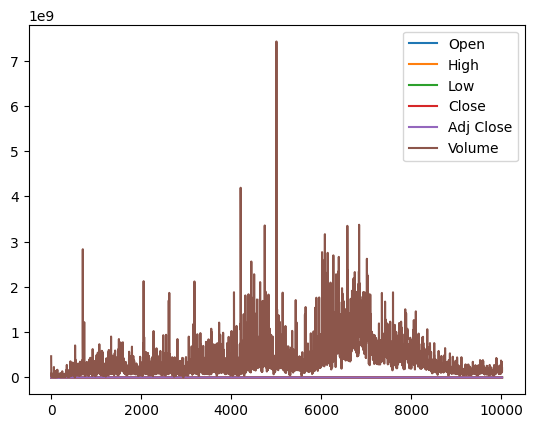

In [8]:
df.plot()

In [9]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

The date column is of Object type(String type), which is not ideal for analysis. Hence we need to convert it into date-time format, by using the `to_datetime()` funtion.

In [10]:
df['Date']

0        1980-12-12
1        1980-12-15
2        1980-12-16
3        1980-12-17
4        1980-12-18
            ...    
10011    2020-08-26
10012    2020-08-27
10013    2020-08-28
10014    2020-08-31
10015    2020-09-01
Name: Date, Length: 10016, dtype: object

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [12]:
df['Date']

0       1980-12-12
1       1980-12-15
2       1980-12-16
3       1980-12-17
4       1980-12-18
           ...    
10011   2020-08-26
10012   2020-08-27
10013   2020-08-28
10014   2020-08-31
10015   2020-09-01
Name: Date, Length: 10016, dtype: datetime64[ns]

In [13]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

There are some null values in the dataset, which might create a hinderence during the analysis of the dataset.

In [14]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
10011,False,False,False,False,False,False,False
10012,False,False,False,False,False,False,False
10013,False,False,False,False,False,False,False
10014,False,False,False,False,False,False,False


In [15]:
df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
10011    False
10012    False
10013    False
10014    False
10015    False
Length: 10016, dtype: bool

In [16]:
df[df.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
165,1981-08-10,NaN,NaN,NaN,NaN,NaN,NaN


From the results given by the previous lines, it is evident that information from 1 row is missing. We dont have any evident reason on why the data is missing(might be a data keeping issue). Dropping the row would not have a drastic effect on the analysis as the period of analysis is 10 yeears.

In [17]:
dataFrame = df.drop(index=165)
dataFrame

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0
...,...,...,...,...,...,...,...
10011,2020-08-26,126.180000,126.992500,125.082497,126.522499,126.522499,163022400.0
10012,2020-08-27,127.142502,127.485001,123.832497,125.010002,125.010002,155552400.0
10013,2020-08-28,126.012497,126.442497,124.577499,124.807503,124.807503,187630000.0
10014,2020-08-31,127.580002,131.000000,126.000000,129.039993,129.039993,225702700.0


In [18]:
dataFrame.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Now there is no null value present in the datatset, which can break the integrity of the dataset. Hence we can ensure that the calculations and the visualization will be accurate.

In [19]:
dataFrame['Year'] = dataFrame['Date'].dt.year

Making a 'Year' column in the dataset which would help in finer analysis. 

In [20]:
dataFrame['Close']-dataFrame['Open']

0        0.000000
1       -0.000558
2       -0.000558
3        0.000000
4        0.000000
           ...   
10011    0.342499
10012   -2.132500
10013   -1.204994
10014    1.459991
10015    1.419998
Length: 10015, dtype: float64

In [21]:
(dataFrame['Close']-dataFrame['Open']).max()

np.float64(5.107506000000001)

In [23]:
(dataFrame['Close']-dataFrame['Open']).min()

np.float64(-4.484997)

The maximum difference between the Opening price and Closing price was `$5.107` and the minimum difference was `-$4.484`

In [24]:
dataFrame.groupby('Year').mean()

,Date,Open,High,Low,Close,Adj Close,Volume
Year,,,,,,,
1980,1980-12-21 16:36:55.384615360,0.136075,0.136461,0.135903,0.135903,0.107222,1.034501e+08
1981,1981-07-02 10:05:42.857142848,0.108868,0.109251,0.108531,0.108531,0.085626,3.252756e+07
1982,1982-07-03 00:00:00.000000000,0.085446,0.086665,0.084630,0.085459,0.067423,8.444667e+07
1983,1983-07-01 23:42:55.494071168,0.167274,0.171085,0.163449,0.167274,0.131972,1.759408e+08
1984,1984-07-01 07:58:06.166007936,0.119956,0.122294,0.117642,0.119651,0.094400,1.659250e+08
1985,1985-07-01 10:40:00.000000000,0.091057,0.092023,0.089937,0.090233,0.071190,1.805249e+08
1986,1986-07-02 05:58:34.624505920,0.144586,0.147048,0.142207,0.144913,0.114330,2.107637e+08
1987,1987-07-02 13:45:17.786561280,0.347817,0.355806,0.339820,0.347751,0.274894,2.362502e+08
1988,1988-07-02 00:22:46.007905152,0.371034,0.376663,0.365092,0.370884,0.295239,1.632134e+08


In the table above we observe the mean value of all the fields. 

## Exploratory Data Analysis

In [25]:
dataFrame['Volume'].sum()

np.float64(3418307436800.0)

In [26]:
dataFrame['Open'].max()

np.float64(132.759995)

In [27]:
dataFrame[dataFrame['Open'] == dataFrame['Open'].max()]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
10015,2020-09-01,132.759995,134.800003,130.529999,134.179993,134.179993,151948100.0,2020


In [28]:
dataFrame[dataFrame['Open'] == dataFrame['Open'].min()]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
395,1982-07-08,0.049665,0.049665,0.049107,0.049107,0.038743,164326400.0,1982


In [29]:
dataFrame['Close'].max()

np.float64(134.179993)

In [30]:
dataFrame[dataFrame['Close'] == dataFrame['Close'].max()]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
10015,2020-09-01,132.759995,134.800003,130.529999,134.179993,134.179993,151948100.0,2020


In [31]:
dataFrame[dataFrame['Close'] == dataFrame['Close'].min()]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
395,1982-07-08,0.049665,0.049665,0.049107,0.049107,0.038743,164326400.0,1982


The total number of stocks traded were 3,418,307,436,800 throughout the history of Apple. The maximum Opening price of the stock was `$132.759` which was on 1st of September, 2020; while the minimum Opening price of the stock was `$0.049` which was on 8th of July, 1982.
The maximum Closing price of the stock was `$134.179`which was on 1st of September, 2020; while the minimum Closing price of the stock was `$0.0491` which  was on 8th of July.

In [32]:
dataFrame[dataFrame['Close'] > (0.1 * dataFrame['Open'] + dataFrame['Open'])]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
496,1982-11-30,0.128906,0.142857,0.128348,0.142299,0.112268,1.591968e+08,1982
532,1983-01-20,0.150112,0.166853,0.150112,0.166853,0.131639,7.078400e+08,1983
687,1983-08-31,0.147879,0.166295,0.147879,0.166295,0.131199,2.002336e+08,1983
721,1983-10-19,0.086496,0.099330,0.085379,0.095982,0.075726,2.873920e+08,1983
921,1984-08-03,0.107701,0.122768,0.107143,0.122210,0.096418,6.180608e+08,1984
1739,1987-10-29,0.305804,0.357143,0.287946,0.352679,0.279037,3.315200e+08,1987
3492,1994-10-05,0.300223,0.340402,0.297991,0.338170,0.288065,7.098000e+08,1994
3995,1996-10-01,0.196429,0.220982,0.196429,0.219866,0.189995,5.392464e+08,1996
4191,1997-07-11,0.119420,0.138393,0.118862,0.135603,0.117180,7.349440e+08,1997
4267,1997-10-28,0.142857,0.165179,0.141741,0.161830,0.139844,3.433136e+08,1997


In [33]:
dataFrame[dataFrame['Close'] < (dataFrame['Open'] - dataFrame['Open'] * 0.1)]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
691,1983-09-07,0.175223,0.175223,0.151228,0.154576,0.121954,3.848544e+08,1983
1070,1985-03-07,0.109933,0.110491,0.098772,0.098772,0.077927,7.339808e+08,1985
1731,1987-10-19,0.430804,0.430804,0.316964,0.325893,0.257845,4.760000e+08,1987
1732,1987-10-20,0.343750,0.375000,0.291295,0.308036,0.243716,5.689600e+08,1987
1736,1987-10-26,0.308036,0.312500,0.246652,0.250000,0.197799,3.136000e+08,1987
1787,1988-01-08,0.397321,0.404018,0.352679,0.357143,0.283182,4.860800e+08,1988
4276,1997-11-10,0.187500,0.191964,0.165179,0.166853,0.144184,1.398242e+09,1997
4478,1998-08-31,0.310268,0.311384,0.276786,0.278460,0.240628,8.682240e+08,1998
4746,1999-09-23,0.635045,0.636161,0.562500,0.565290,0.488489,1.143755e+09,1999
4819,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.732975,7.679728e+08,2000


In [34]:
dataFrame['High'].max()

np.float64(134.800003)

In [35]:
dataFrame[dataFrame['High'] == dataFrame['High'].max()]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
10015,2020-09-01,132.759995,134.800003,130.529999,134.179993,134.179993,151948100.0,2020


In [36]:
dataFrame['Low'].min()

np.float64(0.049107)

In [37]:
dataFrame[dataFrame['Low'] == dataFrame['Low'].min()]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
395,1982-07-08,0.049665,0.049665,0.049107,0.049107,0.038743,164326400.0,1982


In [38]:
dataFrame[dataFrame['Volume'] > dataFrame['Volume'].mean()]

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0,1980
429,1982-08-25,0.077009,0.077567,0.077009,0.077009,0.060757,357078400.0,1982
532,1983-01-20,0.150112,0.166853,0.150112,0.166853,0.131639,707840000.0,1983
533,1983-01-21,0.166853,0.174107,0.165179,0.166853,0.131639,402595200.0,1983
538,1983-01-28,0.181920,0.187500,0.180804,0.183036,0.144407,397734400.0,1983
...,...,...,...,...,...,...,...,...
9895,2020-03-12,63.985001,67.500000,62.000000,62.057499,61.778580,418474000.0,2020
9896,2020-03-13,66.222504,69.980003,63.237499,69.492500,69.180161,370732000.0,2020
9901,2020-03-20,61.794998,62.957500,57.000000,57.310001,57.052418,401693200.0,2020
9993,2020-07-31,102.885002,106.415001,100.824997,106.260002,106.068756,374336800.0,2020


In [39]:
dataFrame['Volume'].rolling(window=2).mean()

0                NaN
1        322459200.0
2        140806400.0
3         96084800.0
4         79945600.0
            ...     
10011    187259000.0
10012    159287400.0
10013    171591200.0
10014    206666350.0
10015    188825400.0
Name: Volume, Length: 10015, dtype: float64

In [40]:
dataFrame.groupby('Year')['Volume'].max()

Year
1980    4.690336e+08
1981    2.313024e+08
1982    3.570784e+08
1983    2.832346e+09
1984    6.267968e+08
1985    7.339808e+08
1986    9.041312e+08
1987    7.772800e+08
1988    6.809600e+08
1989    2.127171e+09
1990    9.337328e+08
1991    1.868373e+09
1992    8.483552e+08
1993    2.120597e+09
1994    9.801344e+08
1995    1.211963e+09
1996    1.026626e+09
1997    4.190480e+09
1998    2.561350e+09
1999    3.357558e+09
2000    7.421641e+09
2001    1.873670e+09
2002    1.709467e+09
2003    1.555708e+09
2004    2.768427e+09
2005    3.164717e+09
2006    2.663769e+09
2007    3.349298e+09
2008    3.372970e+09
2009    1.831634e+09
2010    1.867110e+09
2011    1.880998e+09
2012    1.506120e+09
2013    1.460852e+09
2014    1.065523e+09
2015    6.488252e+08
2016    5.334788e+08
2017    4.479400e+08
2018    3.849868e+08
2019    3.652488e+08
2020    4.268848e+08
Name: Volume, dtype: float64

## Price Trend Analysis

In [41]:
dataFrame['Daily Return'] = dataFrame['Close'].pct_change()

In [42]:
dataFrame['Volatility'] = dataFrame['Daily Return'].rolling(window = 30).std()

In [43]:
type(dataFrame['Volatility'])

pandas.core.series.Series

In [44]:
print(dataFrame['Close'].dtype)

float64


In [45]:
print(dataFrame.dtypes)

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                 float64
Year                     int32
Daily Return           float64
Volatility             float64
dtype: object


In [46]:
dataFrame['Annual Volatility'] = dataFrame['Volatility'] * (252 ** 0.5)

In [47]:
dataFrame.groupby('Year').mean()['Annual Volatility']

Year
1980         NaN
1981    0.527206
1982    0.511424
1983    0.619683
1984    0.471444
1985    0.436033
1986    0.396931
1987    0.570088
1988    0.346454
1989    0.313042
1990    0.425213
1991    0.452885
1992    0.351589
1993    0.454863
1994    0.432039
1995    0.400329
1996    0.492119
1997    0.584253
1998    0.586807
1999    0.586840
2000    0.804116
2001    0.625010
2002    0.478724
2003    0.367390
2004    0.395957
2005    0.386664
2006    0.373347
2007    0.365682
2008    0.530682
2009    0.341274
2010    0.264540
2011    0.251245
2012    0.272417
2013    0.281007
2014    0.207414
2015    0.259486
2016    0.229872
2017    0.169272
2018    0.254062
2019    0.264321
2020    0.422586
Name: Annual Volatility, dtype: float64

In [106]:
dataFrame.groupby('Year').mean()['Annual Volatility'] > 0.5

Year
1980    False
1981     True
1982     True
1983     True
1984    False
1985    False
1986    False
1987     True
1988    False
1989    False
1990    False
1991    False
1992    False
1993    False
1994    False
1995    False
1996    False
1997     True
1998     True
1999     True
2000     True
2001     True
2002    False
2003    False
2004    False
2005    False
2006    False
2007    False
2008     True
2009    False
2010    False
2011    False
2012    False
2013    False
2014    False
2015    False
2016    False
2017    False
2018    False
2019    False
2020    False
Name: Annual Volatility, dtype: bool

During 1981-82, the United States in a severe recession; hence tech got hammered. Also Apple was a relatively young company; hence the stocks were inherently volatile. On October 19, 1987, which is considered as the worst day in stock market in percentage terms, as Dow Jones dropped 22.6% in one day; hence the global market crashed. The volatility was high during the years 2000 and 2008, which reflects the Dot com crash and the Financial Crisis.

Volatility is calculated as the 30-day rolling standard deviation of daily returns, then annualized by multiplying by √252 (the number of trading days in a year). Higher values indicate greater price uncertainty and investment risk.

In [49]:
dataFrame.groupby('Year').mean()['Annual Volatility'].max()

np.float64(0.8041164399783646)

In [50]:
yearly_volatility = dataFrame.groupby('Year')['Annual Volatility'].mean()
most_volatile_year = yearly_volatility.idxmax()
highest_volatility = yearly_volatility.max()
print(most_volatile_year)
print(highest_volatility)

2000
0.8041164399783646


In [51]:
dataFrame.groupby('Year').mean()['Annual Volatility'].min()

np.float64(0.16927185691013258)

In [52]:
yearly_volatility = dataFrame.groupby('Year')['Annual Volatility'].mean()
least_volatile_year = yearly_volatility.idxmin()
lowest_volatility = yearly_volatility.min()
print(least_volatile_year)
print(lowest_volatility)

2017
0.16927185691013258


Doing an yealy analysis to get a better view at the distribution. 

In [53]:
df_15 = dataFrame[dataFrame['Year']==2015]

In [54]:
df_15

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
8589,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.941502,212818400.0,2015,-0.009513,0.014794,0.234845
8590,2015-01-05,27.072500,27.162500,26.352501,26.562500,24.238857,257142000.0,2015,-0.028172,0.015542,0.246715
8591,2015-01-06,26.635000,26.857500,26.157499,26.565001,24.241146,263188400.0,2015,0.000094,0.015228,0.241732
8592,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.581060,160423600.0,2015,0.014022,0.015522,0.246407
8593,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.525522,237458000.0,2015,0.038422,0.016820,0.267014
...,...,...,...,...,...,...,...,...,...,...,...
8836,2015-12-24,27.250000,27.250000,26.987499,27.007500,25.064844,54281600.0,2015,-0.005340,0.015536,0.246626
8837,2015-12-28,26.897499,26.922501,26.545000,26.705000,24.784105,106816800.0,2015,-0.011201,0.015620,0.247967
8838,2015-12-29,26.740000,27.357500,26.715000,27.184999,25.229576,123724800.0,2015,0.017974,0.015213,0.241505
8839,2015-12-30,27.145000,27.174999,26.795000,26.830000,24.900110,100855200.0,2015,-0.013059,0.015003,0.238172


In [55]:
df_15.loc[df_15.index[-1], 'Close']-df_15.loc[df_15.index[0], 'Close']

np.float64(-1.0174990000000008)

In [56]:
((df_15.loc[df_15.index[-1], 'Volume']-df_15.loc[df_15.index[0], 'Volume'])/df_15.loc[df_15.index[0], 'Volume'])*100

np.float64(-23.10382936813734)

In [57]:
df_15['Volume'].sum()

np.float64(52264199600.0)

In [58]:
df_15[((df_15['Close']- df_15['Open'])/df_15['Open'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
8750,2015-08-24,23.717501,27.200001,23.0,25.780001,23.823662,648825200.0,2015,-0.024962,0.021001,0.333379


In [59]:
df_15[((df_15['High']- df_15['Low'])/df_15['Low'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
8742,2015-08-12,28.132500,28.855000,27.407499,28.809999,26.623724,404870000.0,2015,0.015420,0.019370,0.307484
8749,2015-08-21,27.607500,27.975000,26.412500,26.440001,24.433575,513102000.0,2015,-0.061163,0.021202,0.336577
8750,2015-08-24,23.717501,27.200001,23.000000,25.780001,23.823662,648825200.0,2015,-0.024962,0.021001,0.333379
8751,2015-08-25,27.777500,27.777500,25.875000,25.934999,23.966902,414406400.0,2015,0.006012,0.021096,0.334888
8775,2015-09-29,28.207500,28.377501,26.965000,27.264999,25.195972,293461600.0,2015,-0.030061,0.024696,0.392042


There is a 5% percent change in the High and Lows, which suggests that the stock were highly volatile and unstability during the month of August. Further research revealed that in August 2015, Apple faced investor concerns over a market downturn and announced a repair program for some iPhone 6 Plus models with faulty cameras. 

In [60]:
df_16 = dataFrame[dataFrame['Year']==2016]

In [61]:
df_16

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
8841,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.443037,270597600.0,2016,0.000855,0.013931,0.221140
8842,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.830513,223164000.0,2016,-0.025059,0.014123,0.224191
8843,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.364161,273829600.0,2016,-0.019570,0.014266,0.226462
8844,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.378082,324377600.0,2016,-0.042205,0.015716,0.249477
8845,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.496408,283192000.0,2016,0.005288,0.015582,0.247364
...,...,...,...,...,...,...,...,...,...,...,...
9088,2016-12-23,28.897499,29.129999,28.897499,29.129999,27.636169,56998000.0,2016,0.001978,0.009850,0.156371
9089,2016-12-27,29.129999,29.450001,29.122499,29.315001,27.811686,73187600.0,2016,0.006351,0.009855,0.156451
9090,2016-12-28,29.379999,29.504999,29.049999,29.190001,27.693100,83623600.0,2016,-0.004264,0.008470,0.134457
9091,2016-12-29,29.112499,29.277500,29.100000,29.182501,27.685980,60158000.0,2016,-0.000257,0.008283,0.131488


In [62]:
df_16.loc[df_16.index[-1], 'Close']-df_16.loc[df_16.index[0], 'Close']

np.float64(2.6174999999999997)

In [63]:
((df_16.loc[df_16.index[-1], 'Volume']-df_16.loc[df_16.index[0], 'Volume'])/df_16.loc[df_16.index[0], 'Volume'])*100

np.float64(-54.7870343269859)

In [64]:
df_16['Volume'].sum()

np.float64(38729911200.0)

In [65]:
df_16[((df_16['Close']- df_16['Open'])/df_16['Open'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility


In [66]:
df_16[((df_16['High']- df_16['Low'])/df_16['Low'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
8852,2016-01-20,23.775,24.547501,23.355,24.1975,22.45697,289337600.0,2016,0.001345,0.016411,0.260511


In [67]:
df_17 = dataFrame[dataFrame['Year']==2017]

In [68]:
df_17

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
9093,2017-01-03,28.950001,29.082500,28.690001,29.037500,27.548414,115127600.0,2017,0.002849,0.007156,0.113603
9094,2017-01-04,28.962500,29.127501,28.937500,29.004999,27.517582,84472400.0,2017,-0.001119,0.007175,0.113907
9095,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.657520,88774400.0,2017,0.005085,0.006750,0.107155
9096,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.965857,127007600.0,2017,0.011148,0.006976,0.110734
9097,2017-01-09,29.487499,29.857500,29.485001,29.747499,28.222006,134247600.0,2017,0.009159,0.006975,0.110728
...,...,...,...,...,...,...,...,...,...,...,...
9339,2017-12-22,43.669998,43.855000,43.625000,43.752499,42.176311,65397600.0,2017,0.000000,0.009698,0.153958
9340,2017-12-26,42.700001,42.867500,42.419998,42.642502,41.106304,132742000.0,2017,-0.025370,0.010681,0.169550
9341,2017-12-27,42.525002,42.695000,42.427502,42.650002,41.113533,85992800.0,2017,0.000176,0.010664,0.169282
9342,2017-12-28,42.750000,42.962502,42.619999,42.770000,41.229214,65920800.0,2017,0.002814,0.010319,0.163805


In [69]:
df_17.loc[df_17.index[-1], 'Close']-df_17.loc[df_17.index[0], 'Close']

np.float64(13.269998999999999)

In [70]:
((df_17.loc[df_17.index[-1], 'Volume']-df_17.loc[df_17.index[0], 'Volume'])/df_17.loc[df_17.index[0], 'Volume'])*100

np.float64(-9.665796907083966)

In [71]:
df_17['Volume'].sum()

np.float64(27243106000.0)

In [72]:
df_17[((df_17['Close']- df_17['Open'])/df_17['Open'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility


In [73]:
df_17[((df_17['High']- df_17['Low'])/df_17['Low'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
9202,2017-06-09,38.797501,38.797501,36.505001,37.244999,35.634693,259530800.0,2017,-0.038777,0.013237,0.210124


In [74]:
df_18 = dataFrame[dataFrame['Year']==2018]

In [75]:
df_18

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
9344,2018-01-02,42.540001,43.075001,42.314999,43.064999,41.513580,102223600.0,2018,0.017905,0.010515,0.166918
9345,2018-01-03,43.132500,43.637501,42.990002,43.057499,41.506344,118071600.0,2018,-0.000174,0.010458,0.166011
9346,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.699139,89738400.0,2018,0.004645,0.010481,0.166386
9347,2018-01-05,43.360001,43.842499,43.262501,43.750000,42.173893,94640000.0,2018,0.011385,0.010133,0.160852
9348,2018-01-08,43.587502,43.902500,43.482498,43.587502,42.017254,82271200.0,2018,-0.003714,0.009975,0.158350
...,...,...,...,...,...,...,...,...,...,...,...
9590,2018-12-24,37.037498,37.887501,36.647499,36.707500,35.916355,148676800.0,2018,-0.025874,0.024043,0.381665
9591,2018-12-26,37.075001,39.307499,36.680000,39.292500,38.445637,234330000.0,2018,0.070422,0.028233,0.448192
9592,2018-12-27,38.959999,39.192501,37.517502,39.037498,38.196133,212468400.0,2018,-0.006490,0.027095,0.430116
9593,2018-12-28,39.375000,39.630001,38.637501,39.057499,38.215702,169165600.0,2018,0.000512,0.027121,0.430534


In [76]:
df_18.loc[df_18.index[-1], 'Close']-df_18.loc[df_18.index[0], 'Close']

np.float64(-3.6299980000000005)

In [77]:
((df_18.loc[df_18.index[-1], 'Volume']-df_18.loc[df_18.index[0], 'Volume'])/df_18.loc[df_18.index[0], 'Volume'])*100

np.float64(36.96837129586514)

In [78]:
df_18['Volume'].sum()

np.float64(34156144800.0)

In [79]:
df_18[((df_18['Close']- df_18['Open'])/df_18['Open'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
9368,2018-02-06,38.707500,40.930000,38.50,40.7575,39.289200,272975200.0,2018,0.041792,0.015464,0.245479
9591,2018-12-26,37.075001,39.307499,36.68,39.2925,38.445637,234330000.0,2018,0.070422,0.028233,0.448192


In [80]:
df_18[((df_18['High']- df_18['Low'])/df_18['Low'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
9367,2018-02-05,39.775002,40.970001,39.000000,39.122501,37.713100,290954000.0,2018,-0.024984,0.013109,0.208101
9368,2018-02-06,38.707500,40.930000,38.500000,40.757500,39.289200,272975200.0,2018,0.041792,0.015464,0.245479
9371,2018-02-09,39.267502,39.472500,37.560001,39.102501,37.847511,282690400.0,2018,0.008121,0.016075,0.255190
9552,2018-10-29,54.797501,54.922501,51.522499,53.060001,51.735893,183742000.0,2018,-0.018770,0.018173,0.288480
9587,2018-12-19,41.500000,41.862499,39.772499,40.222500,39.355591,196189200.0,2018,-0.031192,0.024447,0.388077
9589,2018-12-21,39.215000,39.540001,37.407501,37.682499,36.870335,382978400.0,2018,-0.038896,0.023896,0.379335
9591,2018-12-26,37.075001,39.307499,36.680000,39.292500,38.445637,234330000.0,2018,0.070422,0.028233,0.448192


In [81]:
df_19 = dataFrame[dataFrame['Year']==2019]

In [82]:
df_19

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
9595,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.629097,148158800.0,2019,0.001141,0.026392,0.418962
9596,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.781353,365248800.0,2019,-0.099607,0.031211,0.495462
9597,2019-01-04,36.132500,37.137501,35.950001,37.064999,36.266144,234428400.0,2019,0.042689,0.032099,0.509557
9598,2019-01-07,37.174999,37.207500,36.474998,36.982498,36.185429,219111200.0,2019,-0.002226,0.031168,0.494769
9599,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.875229,164101200.0,2019,0.019063,0.031481,0.499749
...,...,...,...,...,...,...,...,...,...,...,...
9842,2019-12-24,71.172501,71.222504,70.730003,71.067497,70.580566,48478800.0,2019,0.000951,0.010149,0.161110
9843,2019-12-26,71.205002,72.495003,71.175003,72.477501,71.980911,93121200.0,2019,0.019840,0.010589,0.168089
9844,2019-12-27,72.779999,73.492500,72.029999,72.449997,71.953598,146266000.0,2019,-0.000379,0.010545,0.167404
9845,2019-12-30,72.364998,73.172501,71.305000,72.879997,72.380653,144114400.0,2019,0.005935,0.010384,0.164840


In [83]:
df_19.loc[df_19.index[-1], 'Close']-df_19.loc[df_19.index[0], 'Close']

np.float64(33.932498)

In [84]:
((df_19.loc[df_19.index[-1], 'Volume']-df_19.loc[df_19.index[0], 'Volume'])/df_19.loc[df_19.index[0], 'Volume'])*100

np.float64(-31.961111996047485)

In [85]:
df_19['Volume'].sum()

np.float64(28254942800.0)

In [86]:
df_19[((df_19['Close']- df_19['Open'])/df_19['Open'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility


In [87]:
df_19[((df_19['High']- df_19['Low'])/df_19['Low'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
9741,2019-08-01,53.474998,54.507500,51.685001,52.107498,51.400280,216071600.0,2019,-0.021639,0.011752,0.186560
9749,2019-08-13,50.255001,53.035000,50.119999,52.242500,51.729252,188874000.0,2019,0.042348,0.017555,0.278673
9757,2019-08-23,52.357498,53.012501,50.250000,50.660000,50.162300,187272000.0,2019,-0.046221,0.020583,0.326739
9805,2019-10-31,61.810001,62.292500,59.314999,62.189999,61.579021,139162000.0,2019,0.022610,0.013280,0.210811


In [88]:
df_20 = dataFrame[dataFrame['Year']==2020]

In [89]:
df_20

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
9847,2020-01-02,74.059998,75.150002,73.797501,75.087502,74.573036,135480400.0,2020,0.022816,0.010884,0.172774
9848,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.848030,146322800.0,2020,-0.009722,0.011099,0.176186
9849,2020-01-06,73.447502,74.989998,73.187500,74.949997,74.436470,118387200.0,2020,0.007968,0.010732,0.170368
9850,2020-01-07,74.959999,75.224998,74.370003,74.597504,74.086395,108872000.0,2020,-0.004703,0.010739,0.170469
9851,2020-01-08,74.290001,76.110001,74.290001,75.797501,75.278160,132079200.0,2020,0.016086,0.010897,0.172978
...,...,...,...,...,...,...,...,...,...,...,...
10011,2020-08-26,126.180000,126.992500,125.082497,126.522499,126.522499,163022400.0,2020,0.013599,0.027165,0.431231
10012,2020-08-27,127.142502,127.485001,123.832497,125.010002,125.010002,155552400.0,2020,-0.011954,0.027156,0.431082
10013,2020-08-28,126.012497,126.442497,124.577499,124.807503,124.807503,187630000.0,2020,-0.001620,0.027150,0.430995
10014,2020-08-31,127.580002,131.000000,126.000000,129.039993,129.039993,225702700.0,2020,0.033912,0.027446,0.435696


In [90]:
df_20.loc[df_20.index[-1], 'Close']-df_20.loc[df_20.index[0], 'Close']

np.float64(59.092490999999995)

In [91]:
((df_20.loc[df_20.index[-1], 'Volume']-df_20.loc[df_20.index[0], 'Volume'])/df_20.loc[df_20.index[0], 'Volume'])*100

np.float64(12.155042352989804)

In [92]:
df_20['Volume'].sum()

np.float64(28793265200.0)

In [93]:
df_20[((df_20['Close']- df_20['Open'])/df_20['Open'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
9886,2020-02-28,64.315002,69.602501,64.092499,68.339996,68.032837,426884800.0,2020,-0.000585,0.022942,0.364192
9887,2020-03-02,70.570000,75.360001,69.430000,74.702499,74.366737,341397200.0,2020,0.093101,0.028896,0.458703


In [94]:
df_20[((df_20['High']- df_20['Low'])/df_20['Low'])*100 > 5]

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
9882,2020-02-24,74.315002,76.044998,72.307503,74.544998,74.209946,222195200.0,2020,-0.047500,0.019222,0.305145
9883,2020-02-25,75.237503,75.632500,71.532501,72.019997,71.696297,230673600.0,2020,-0.033872,0.020117,0.319352
9886,2020-02-28,64.315002,69.602501,64.092499,68.339996,68.032837,426884800.0,2020,-0.000585,0.022942,0.364192
9887,2020-03-02,70.570000,75.360001,69.430000,74.702499,74.366737,341397200.0,2020,0.093101,0.028896,0.458703
9888,2020-03-03,75.917503,76.000000,71.449997,72.330002,72.004913,319475600.0,2020,-0.031759,0.029314,0.465347
9892,2020-03-09,65.937500,69.522499,65.750000,66.542503,66.243423,286744800.0,2020,-0.079092,0.034157,0.542219
9893,2020-03-10,69.285004,71.610001,67.342499,71.334999,71.014381,285290000.0,2020,0.072022,0.036627,0.581438
9895,2020-03-12,63.985001,67.500000,62.000000,62.057499,61.778580,418474000.0,2020,-0.098755,0.040164,0.637583
9896,2020-03-13,66.222504,69.980003,63.237499,69.492500,69.180161,370732000.0,2020,0.119808,0.046463,0.737575
9897,2020-03-16,60.487499,64.769997,60.000000,60.552502,60.280346,322423600.0,2020,-0.128647,0.051283,0.814099


## Seasonality Analysis

In [95]:
dataFrame

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0,1980,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0,1980,-0.052171,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0,1980,-0.073398,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0,1980,0.024751,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0,1980,0.028992,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10011,2020-08-26,126.180000,126.992500,125.082497,126.522499,126.522499,163022400.0,2020,0.013599,0.027165,0.431231
10012,2020-08-27,127.142502,127.485001,123.832497,125.010002,125.010002,155552400.0,2020,-0.011954,0.027156,0.431082
10013,2020-08-28,126.012497,126.442497,124.577499,124.807503,124.807503,187630000.0,2020,-0.001620,0.027150,0.430995
10014,2020-08-31,127.580002,131.000000,126.000000,129.039993,129.039993,225702700.0,2020,0.033912,0.027446,0.435696


In [96]:
dataFrame['Month'] = dataFrame['Date'].dt.month

In [97]:
dataFrame.groupby('Month')['Daily Return'].mean() * 21

Month
1     0.042609
2     0.022084
3     0.026649
4     0.042909
5     0.021449
6    -0.027792
7     0.027754
8     0.054206
9    -0.040870
10    0.064964
11    0.023907
12    0.017554
Name: Daily Return, dtype: float64

Monthly returns were averaged across all 40 years to identify seasonal patterns. Months consistently showing positive average return represent favourable entry points, while negative months suggest period of caution.

## Volumne v/s Price Movement

In [98]:
dataFrame

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Volatility,Annual Volatility,Month
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.101261,469033600.0,1980,NaN,NaN,NaN,12
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095978,175884800.0,1980,-0.052171,NaN,NaN,12
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088934,105728000.0,1980,-0.073398,NaN,NaN,12
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.091135,86441600.0,1980,0.024751,NaN,NaN,12
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093777,73449600.0,1980,0.028992,NaN,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...
10011,2020-08-26,126.180000,126.992500,125.082497,126.522499,126.522499,163022400.0,2020,0.013599,0.027165,0.431231,8
10012,2020-08-27,127.142502,127.485001,123.832497,125.010002,125.010002,155552400.0,2020,-0.011954,0.027156,0.431082,8
10013,2020-08-28,126.012497,126.442497,124.577499,124.807503,124.807503,187630000.0,2020,-0.001620,0.027150,0.430995,8
10014,2020-08-31,127.580002,131.000000,126.000000,129.039993,129.039993,225702700.0,2020,0.033912,0.027446,0.435696,8


In [99]:
dataFrame['Volume'].corr(dataFrame['Daily Return'])

np.float64(0.00024187901717589403)

In [100]:
dataFrame['Volume'].corr(dataFrame['Open'])

np.float64(-0.14218262359678396)

In [101]:
dataFrame['Volume'].corr(dataFrame['Close'])

np.float64(-0.1424651474672031)

In [102]:
dataFrame['Volume'].corr(dataFrame['High'])

np.float64(-0.14121598668832186)

In [103]:
dataFrame['Volume'].corr(dataFrame['Low'])

np.float64(-0.1437161159573442)

In [104]:
dataFrame['Volume'].corr(dataFrame['Volatility'])

np.float64(0.16694749692239813)

The correlation between trading volumnes and Daily returns/ and other prices is about +/-0.14, which is negligible relationship. This suggests that volumne is  not a reliable predictor of a price direction for Apple over this period.

## Future Work

Future works include to train a model on this dataset and try to predict the future with the accuracy of 54% and a 1.4+ Sharpe ratio. Sharpie ratio measures the performance of an investement such as a security or portfolio compared to risk free assets, after adjusting for its risk.

Get more recent data and then test the model which has been trained. After testing the model analyse the data for in depth analysis and further deeping our understanding of the dataset. 